# Bayes Factor Plots

This notebook reproduces the Bayes factor plots shown in figures 4 and 8 in the paper.

In [ ]:
# Import required libraries
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from bilby.core.result import read_in_result
import matplotlib.ticker as mticker

# Add path to custom modules to sys.path
parent_dir = os.path.abspath('..')
if parent_dir not in sys.path:
    sys.path.append(parent_dir)

# Import custom modules
from config import *

/mnt/lustre/shared_conda/envs/hoyc/igwn-py310-20240725/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


## Function Initialisation

In [2]:
def plot_bf(log_bf_comparison_list, param_vals, labels, save_path=None):
    fig = plt.figure()


    linestyle_list = ['-', '--']

    for i in range(len(log_bf_comparison_list)):
        log_bf_comparison = log_bf_comparison_list[i]
        plt.plot(param_vals, log_bf_comparison[0], marker='o', linestyle=linestyle_list[i], color=color_map[DICT_KEYS[0]])
        plt.plot(param_vals, log_bf_comparison[1], marker='s', linestyle=linestyle_list[i], color=color_map[DICT_KEYS[2]])

    plt.fill_between(param_vals, 0, 0.5, color='tab:red', alpha=0.1)
    plt.fill_between(param_vals, 0.5, 1, color='tab:orange', alpha=0.1)
    plt.fill_between(param_vals, 1, 2, color='tab:green', alpha=0.1)
    plt.fill_between(param_vals, 2, plt.ylim()[1], color='tab:blue', alpha=0.1)
    plt.xticks(param_vals)

    legend_elements = [Line2D([0], [0], color=color_map[DICT_KEYS[2]], marker='s', lw=2, label=f"{DICT_KEYS[0]} vs {DICT_KEYS[2]}"),
                       Line2D([0], [0], color=color_map[DICT_KEYS[0]], marker='o', lw=2, label=f"{DICT_KEYS[0]} vs {DICT_KEYS[1]}")]

    ax = plt.gca()
    plt.ylabel(labels[1])
    plt.xlabel(labels[0])
    plt.yscale("log")
    ax.yaxis.set_major_formatter(mticker.ScalarFormatter())
    ax.ticklabel_format(style='plain', axis='y')
    my_kwargs = legend_kwargs.copy()
    my_kwargs["loc"] = "lower right"
    plt.legend(handles=legend_elements, **my_kwargs)
    plt.yticks([1, 10])

    plt.tight_layout()

    if save_path:
        plt.savefig(save_path, format="png", transparent=True)

    plt.show()

## Total Mass

In [3]:
outdir = "total_mass"
param = "M"
param_val_list = [200, 250, 300, 350, 400, 450]
param_val_labels = [f'{param}_{val}' for val in param_val_list]

f_22_10_evidences = [read_in_result(FILE_PATH.format(outdir=outdir, param=param, freq=STARTING_FREQUENCIES[0])).log_evidence for param in param_val_labels]
f_22_13_evidences = [read_in_result(FILE_PATH.format(outdir=outdir, param=param, freq=STARTING_FREQUENCIES[1])).log_evidence for param in param_val_labels]
f_22_20_evidences = [read_in_result(FILE_PATH.format(outdir=outdir, param=param, freq=STARTING_FREQUENCIES[2])).log_evidence for param in param_val_labels]

log10_bf_10_vs_13_M = (np.array(f_22_10_evidences) - np.array(f_22_13_evidences)) / np.log(10)
log10_bf_10_vs_20_M = (np.array(f_22_10_evidences) - np.array(f_22_20_evidences)) / np.log(10)

In [4]:
outdir = "total_mass_spin_09"
param_val_labels = [f'{param}_{val}_spin_09' for val in param_val_list]

f_22_10_evidences = [read_in_result(FILE_PATH.format(outdir=outdir, param=param, freq=STARTING_FREQUENCIES[0])).log_evidence for param in param_val_labels]
f_22_13_evidences = [read_in_result(FILE_PATH.format(outdir=outdir, param=param, freq=STARTING_FREQUENCIES[1])).log_evidence for param in param_val_labels]
f_22_20_evidences = [read_in_result(FILE_PATH.format(outdir=outdir, param=param, freq=STARTING_FREQUENCIES[2])).log_evidence for param in param_val_labels]

log10_bf_10_vs_13_M_spin_09 = (np.array(f_22_10_evidences) - np.array(f_22_13_evidences)) / np.log(10)
log10_bf_10_vs_20_M_spin_09 = (np.array(f_22_10_evidences) - np.array(f_22_20_evidences)) / np.log(10)

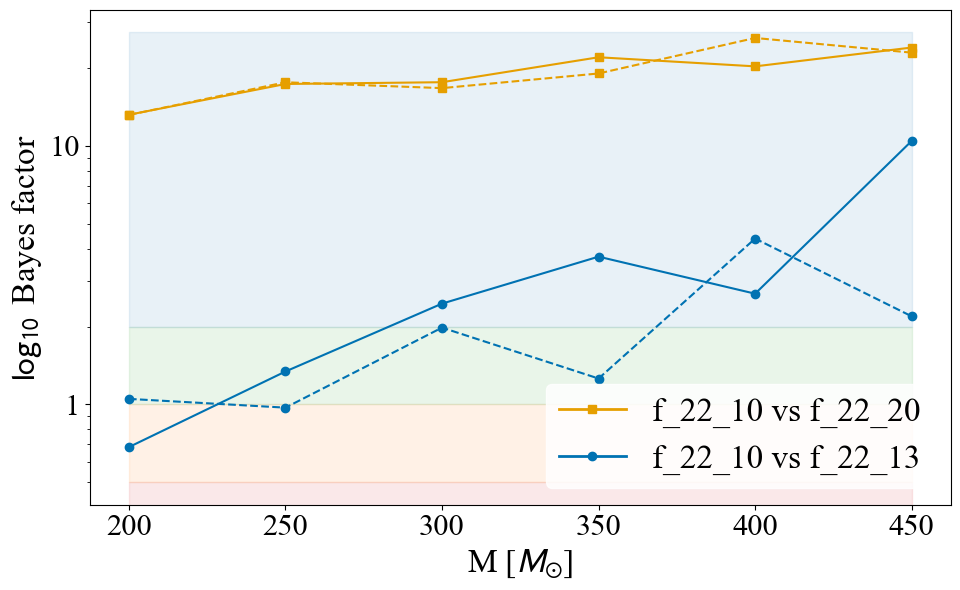

In [5]:
axis_labels = [r"M [$M_{\odot}$]", r"$\log_{10}$ Bayes factor"] # Axis labels for the parameters (x, y)
path_to_save = '../plots/bayes_factor/' # Path to save the plot
plot_name = f'bayes_factor_{param}.png' # Name of the plot to save (default png)
log_bf_comparison_list = [[log10_bf_10_vs_13_M, log10_bf_10_vs_20_M], [log10_bf_10_vs_13_M_spin_09, log10_bf_10_vs_20_M_spin_09]]

plot_bf(
    log_bf_comparison_list,
    param_val_list,
    labels=axis_labels,
    save_path=path_to_save + plot_name
)

## Signal-To-Noise Ratio

In [6]:
outdir = "snr"
param = "snr"
param_val_list = [20, 30, 40, 50, 60, 70, 80, 90, 100]
param_val_labels = [f'{param}_{val}' for val in param_val_list]

f_22_10_evidences = [read_in_result(FILE_PATH.format(outdir=outdir, param=param, freq=STARTING_FREQUENCIES[0])).log_evidence for param in param_val_labels]
f_22_13_evidences = [read_in_result(FILE_PATH.format(outdir=outdir, param=param, freq=STARTING_FREQUENCIES[1])).log_evidence for param in param_val_labels]
f_22_20_evidences = [read_in_result(FILE_PATH.format(outdir=outdir, param=param, freq=STARTING_FREQUENCIES[2])).log_evidence for param in param_val_labels]

log10_bf_10_vs_13_snr = (np.array(f_22_10_evidences) - np.array(f_22_13_evidences)) / np.log(10)
log10_bf_10_vs_20_snr = (np.array(f_22_10_evidences) - np.array(f_22_20_evidences)) / np.log(10)

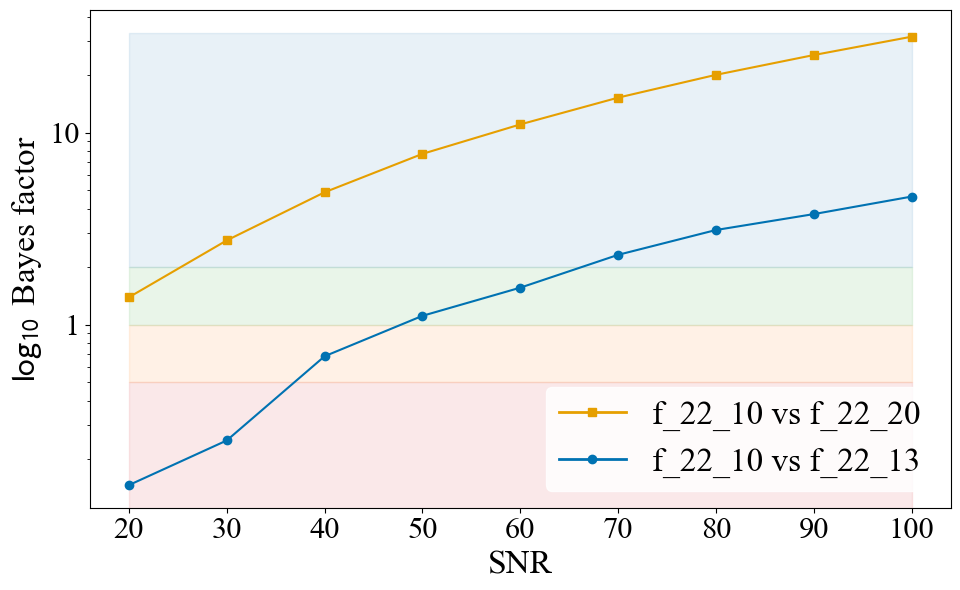

In [7]:
axis_labels = ["SNR", r"$\log_{10}$ Bayes factor"] # Axis labels for the parameters (x, y)
path_to_save = '../plots/bayes_factor/' # Path to save the plot
plot_name = f'bayes_factor_{param}.png' # Name of the plot to save (default png)
log_bf_comparison_list = [[log10_bf_10_vs_13_snr, log10_bf_10_vs_20_snr]]

plot_bf(
    log_bf_comparison_list,
    param_val_list,
    labels=axis_labels,
    save_path=path_to_save + plot_name
)